<a href="https://colab.research.google.com/github/pratheek3010/Data-Analysis/blob/main/Data_Analysis_of_AntiDepressants.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Dataset description

1. Describe your dataset. Explain the meaning of the columns that is there in the
dataset.

Column | Meaning
-------|--------
Age| Age of the patient 
Condition|Symptoms the patients are showing
Date| The date when the review for the drug was given
Drug| Name of the prescribed drug
DrugID| ID of the drug
Ease of use| A number on the scale of 0-10 denoting how easy the drug is to use
Effectiveness|A number on the scale of 0-10 denoting how effective the drug is
Reviews| The review of the drug given by the patient to who it was administered
Satisfaction| A number on the scale of 0-10 that denotes the patient's satisfaction with the drug
Sex| The gender of the patient
Sides| The side-effects of the drug
Usefulcount| The number of people who found the review of the drug useful
Score| The Review score based on the number of keywords present in a review
Sentiment| The sentiment of the review.


#Importing the required libraries and reading the csv file

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download("vader_lexicon")
warnings.filterwarnings("ignore")
data=pd.read_csv("/content/Depression_final.csv")

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


#Preprocessing data

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
print("Size of dataset:")
print("Rows:")
print(data.shape[0])
print("Columns:")
print(data.shape[1])


Size of dataset:
Rows:
2859
Columns:
15


In [ ]:
data=data.replace(r'^\s*$', np.nan, regex=True)

In [ ]:
#Summary statistics
data.describe()

Unnamed: 0  Unnamed: 0.1  ...        Score    Sentiment
count  2859.000000   2859.000000  ...  2859.000000  2859.000000
mean   1429.000000   1429.000000  ...    14.260930    -0.186698
std     825.466535    825.466535  ...    11.625503     0.667475
min       0.000000      0.000000  ...     0.000000    -0.997000
25%     714.500000    714.500000  ...     6.000000    -0.823050
50%    1429.000000   1429.000000  ...    11.000000    -0.355000
75%    2143.500000   2143.500000  ...    19.000000     0.450700
max    2858.000000   2858.000000  ...    72.000000     0.995800

[8 rows x 10 columns]

In [ ]:
numeric=data.select_dtypes(include=[np.number])
print(numeric)

      Unnamed: 0  Unnamed: 0.1  Unnamed: 0.1.1  ...  UsefulCount  Score  Sentiment
0              0             0           28936  ...            0     19     0.9527
1              1             1           28958  ...            0      5    -0.9509
2              2             2           29010  ...            0     23    -0.9721
3              3             3           29166  ...            0     11    -0.2263
4              4             4           29194  ...            0     14    -0.9178
...          ...           ...             ...  ...          ...    ...        ...
2854        2854          2854          319078  ...            7      9     0.1531
2855        2855          2855          319080  ...           13      7    -0.5576
2856        2856          2856          319081  ...            6     18     0.9547
2857        2857          2857          319082  ...            9     10    -0.6081
2858        2858          2858          319084  ...            6     12     0.7470

[28

In [ ]:
#missing values
data=data.replace(r'^\s*$', np.nan, regex=True)
print(df_final.isnull().sum())

Age              1188
Condition           0
Date                0
Drug                0
DrugId              0
EaseofUse           0
Effectiveness       0
Reviews          5246
Satisfaction        0
Sex              1905
Sides              89
UsefulCount         0
dtype: int64
Pain                         25232
Major Depressive Disorder     4256
Name: Condition, dtype: int64


In [ ]:
print(df_final["Age"].isnull().sum())
print(df_final["Sex"].isnull().sum())
print(df_final["Reviews"].isnull().sum())
df_final.dropna(subset=["Age","Reviews"],inplace=True)
df_final["Sex"]=df_final["Sex"].fillna(value="Female")#impute missing gender values with mode.
print(df_final["Age"].isnull().sum())
print(df_final["Sex"].isnull().sum())
print(df_final["Reviews"].isnull().sum())
print(df_final.shape)

1188
1905
5246
0
0
0
(23590, 12)


# Visualizations

## Bar graphs 

### Bar graphs - Effectiveness vs age for a specific drug by gender

In [ ]:
def plot_age(vs):

  import matplotlib.pyplot as plt
  import numpy as np
  %matplotlib inline

  drug_data2 = data.loc[data['Drug'] == vs]
  labels =  [i for i in dict(drug_data2["Age"].value_counts())]
  m_eff=[]
  f_eff=[]
  for age in labels:
    m_eff.append(data[(data["Sex"]=="Male")&(data["Age"]==age)]['Effectiveness'].mean())
    f_eff.append(data[(data["Sex"]=="Female")&(data["Age"]==age)]['Effectiveness'].mean())

  x = np.arange(len(labels))  
  width = 0.35  

  fig, ax = plt.subplots()
  rects1 = ax.bar(x - width/2, m_eff, width, label='Men', color = 'purple')
  rects2 = ax.bar(x + width/2, f_eff, width, label='Women', color = 'blue' )

  ax.set_ylabel('Average Effectiveness')
  ax.set_title( 'Effectiveness for '+vs+' by age and gender')
  ax.set_xticks(x)
  ax.set_xticklabels(labels)
  ax.legend()
  fig.tight_layout()
  plt.show()
  
  

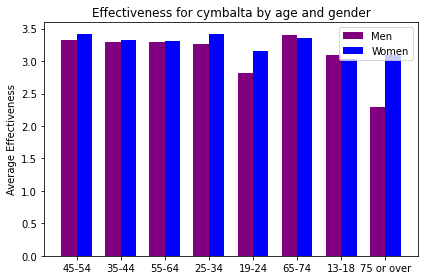

In [ ]:
plot_age('cymbalta')

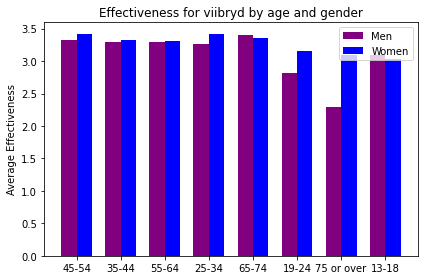

In [ ]:
plot_age('viibryd')

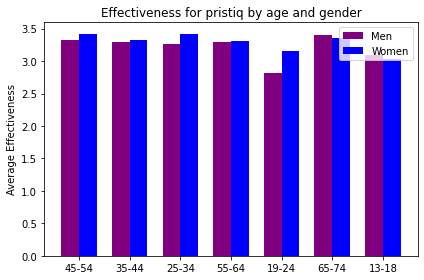

In [ ]:
plot_age('pristiq')

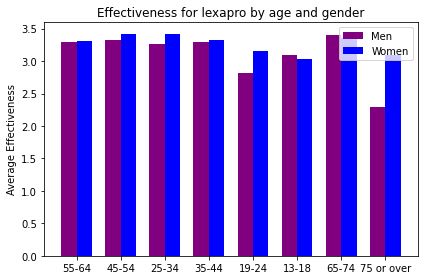

In [ ]:
plot_age('lexapro')

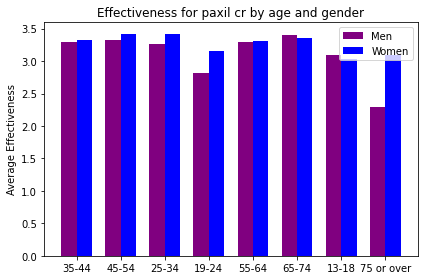

In [ ]:
plot_age('paxil cr')

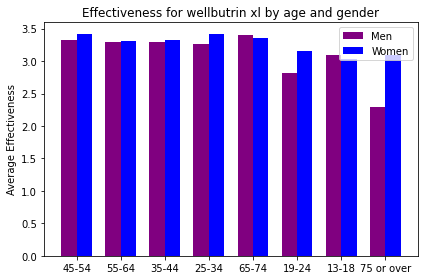

In [ ]:
plot_age('wellbutrin xl')

### Bar Graphs - property vs drug by gender

In [ ]:
def plot_gender(vs):

  import matplotlib.pyplot as plt
  import numpy as np
  %matplotlib inline

  labels =  [i for i in dict(data["Drug"].value_counts())]
  m_eff=[]
  f_eff=[]
  for drug in labels:
    m_eff.append(data[(data["Sex"]=="Male")&(data["Drug"]==drug)][vs].mean())
    f_eff.append(data[(data["Sex"]=="Female")&(data["Drug"]==drug)][vs].mean())

  x = np.arange(len(labels))  
  width = 0.35  

  fig, ax = plt.subplots()
  rects1 = ax.bar(x - width/2, m_eff, width, label='Men',color="deepskyblue")
  rects2 = ax.bar(x + width/2, f_eff, width, label='Women',color="orchid")

  ax.set_ylabel('Average '+vs)
  ax.set_title( vs+'  by drug  and gender')
  ax.set_xticks(x)
  ax.set_xticklabels(labels)
  ax.legend()
  fig.tight_layout()
  plt.show()


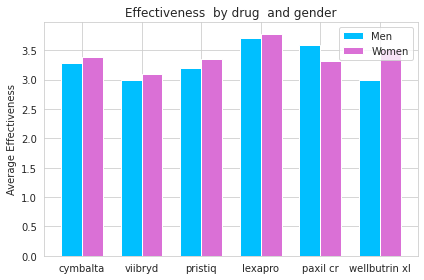

In [ ]:
plot_gender("Effectiveness")

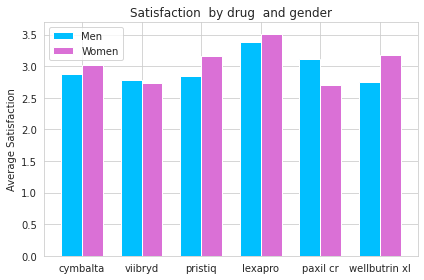

In [ ]:
plot_gender("Satisfaction")

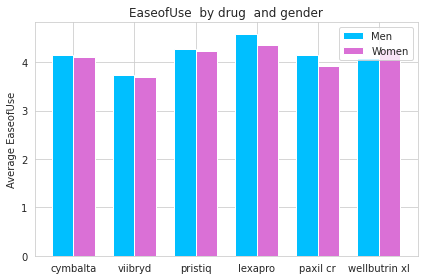

In [ ]:
plot_gender("EaseofUse")

### Bar Graphs - average property vs drug

In [ ]:
def drug_avgs(parameter):
  import matplotlib.pyplot as plt
  %matplotlib inline
  x =[i for i in dict(data["Drug"].value_counts())]
  x_pos = [i for i, _ in enumerate(x)]
  avg=[]
  for drug in x:
    avg.append(data[data["Drug"]==drug][parameter].mean())
  plt.bar(x_pos,avg, color='mediumseagreen')
  plt.xlabel("Drug")
  plt.ylabel(parameter)
  plt.title(parameter+" vs Drug")
  plt.xticks(x_pos, x)
  plt.show()

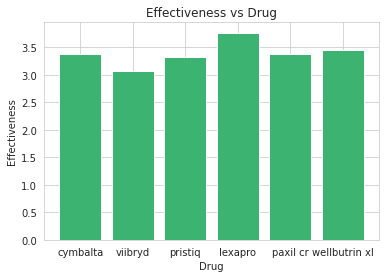

In [ ]:
drug_avgs("Effectiveness")

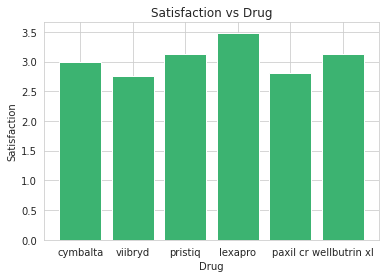

In [ ]:
drug_avgs("Satisfaction")

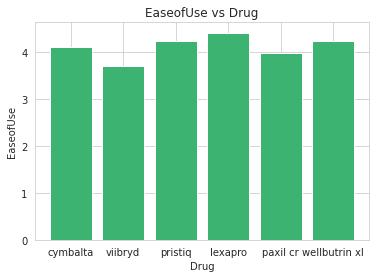

In [ ]:
drug_avgs("EaseofUse")

## Word clouds

In [ ]:
def make_cloud(drug,df,gender):
  from wordcloud import WordCloud, STOPWORDS 
  import matplotlib.pyplot as plt
  stopwords = set(STOPWORDS)
  text=" ".join(df[(df["Drug"]==drug)&(df["Sex"]==gender)]["Reviews"]).lower()
  more_stop=["cymbalta","lexapro","viibryd","pristiq","paxil cr","paxil","wellbutrin"," wellbutrin xl ","depression","anxiety","drug","anti-depressant","antidepressant","become","day","year","doctor","medication","med"]
  for word in more_stop:
    text=text.replace(word,"")
  wordcloud = WordCloud(width = 800, height = 800, background_color ='white', stopwords = stopwords, min_font_size = 10).generate(text)                    
  plt.figure(figsize = (8, 8), facecolor = None) 
  plt.imshow(wordcloud) 
  plt.axis("off") 
  plt.tight_layout(pad = 0) 
  plt.show() 
  return wordcloud.words_


-------- cymbalta --------
************Male*************


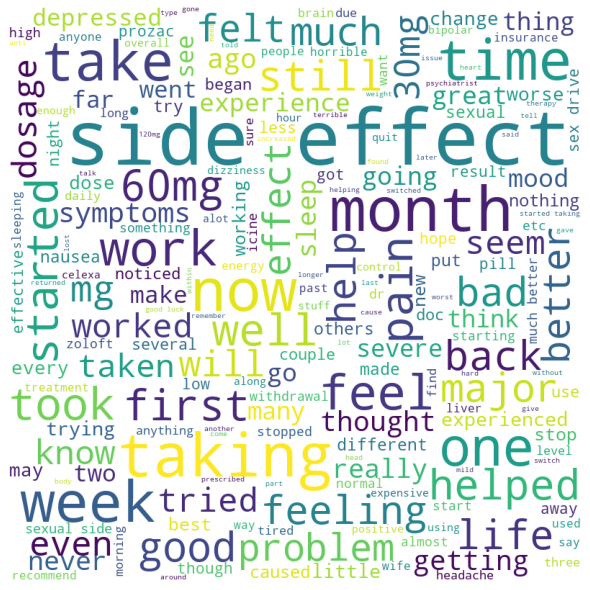

***********Female***********


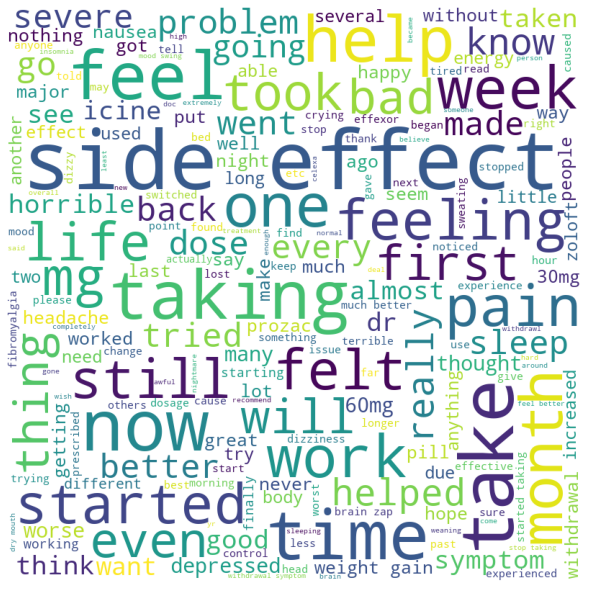

-------- viibryd --------
************Male*************


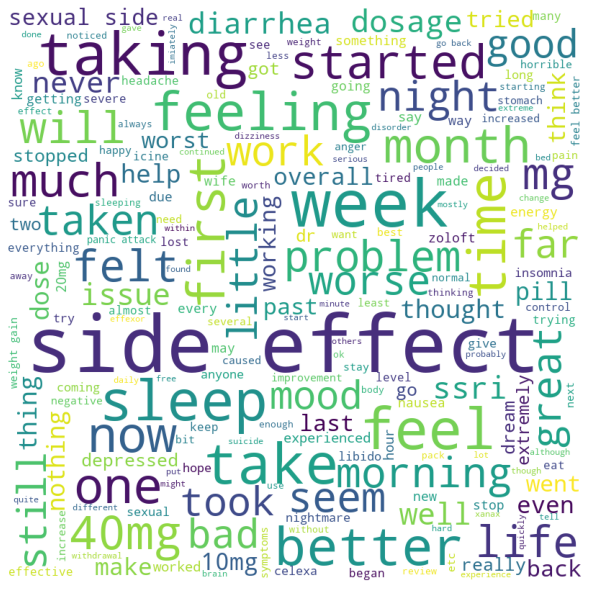

***********Female***********


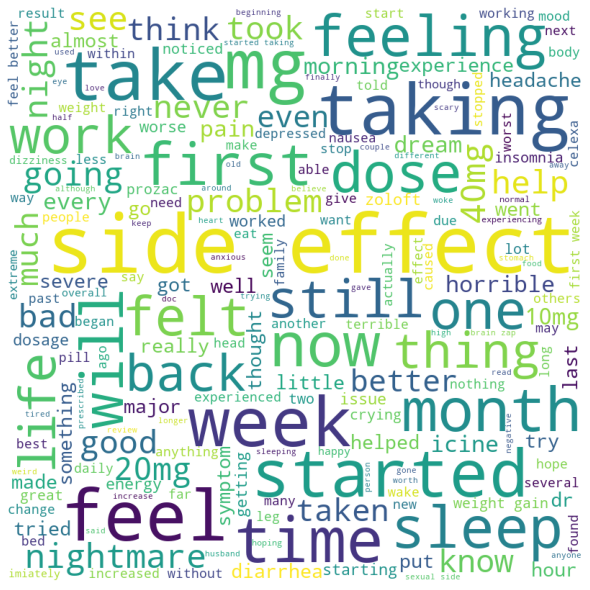

-------- pristiq --------
************Male*************


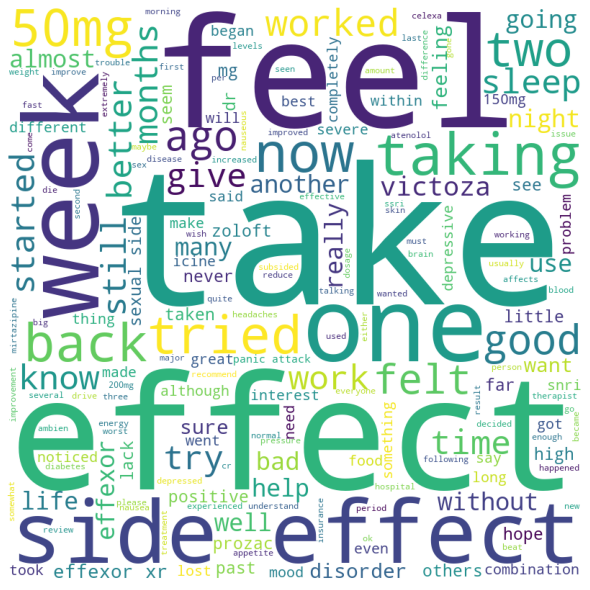

***********Female***********


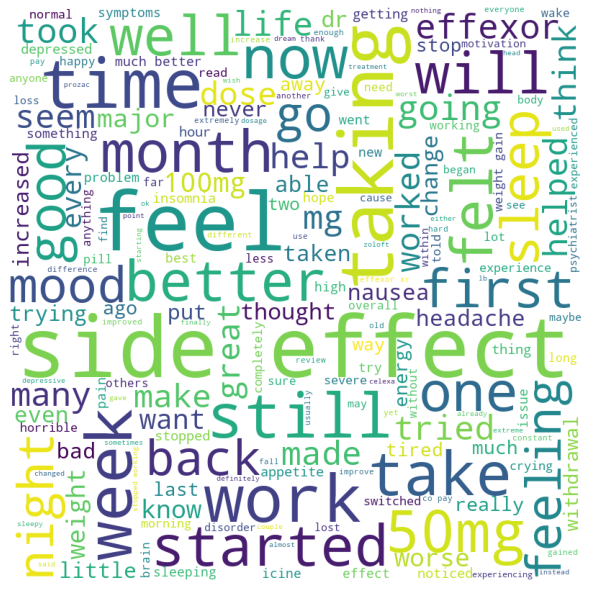

-------- lexapro --------
************Male*************


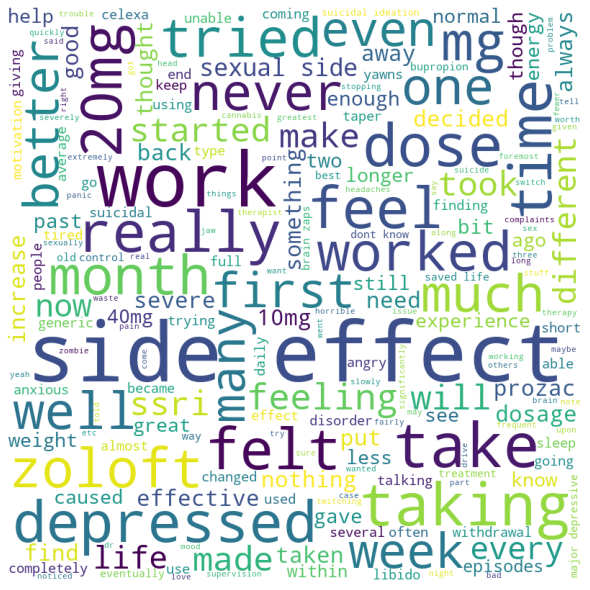

***********Female***********


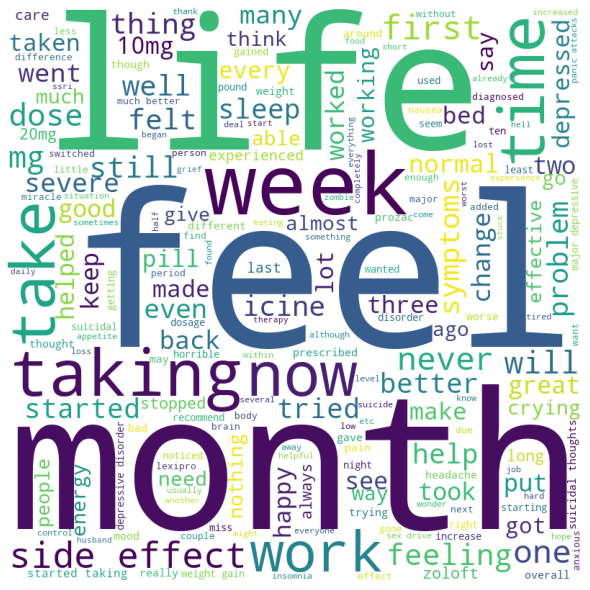

-------- paxil cr --------
************Male*************


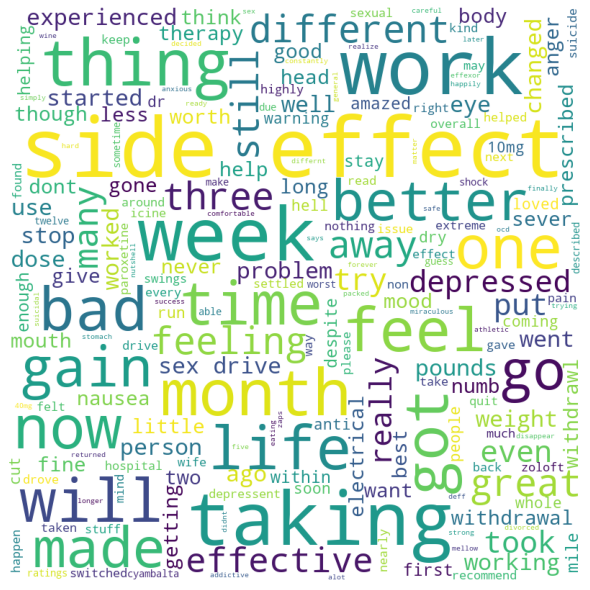

***********Female***********


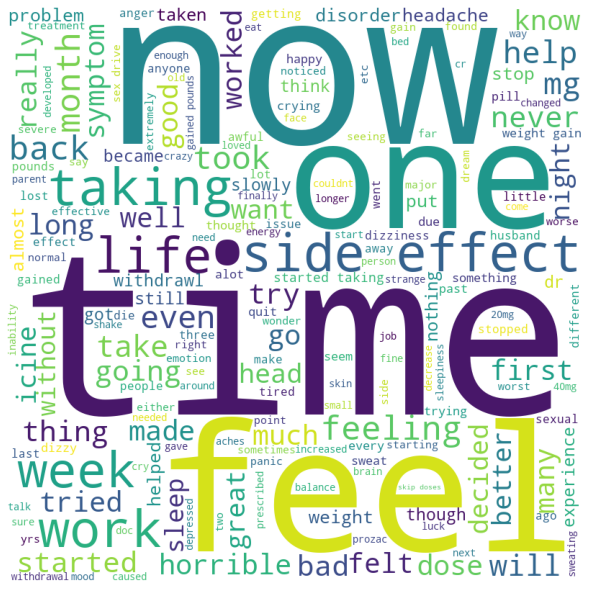

-------- wellbutrin xl --------
************Male*************


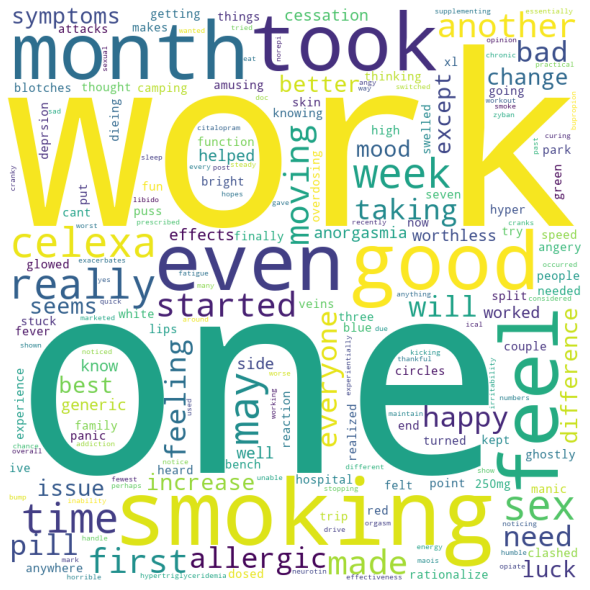

***********Female***********


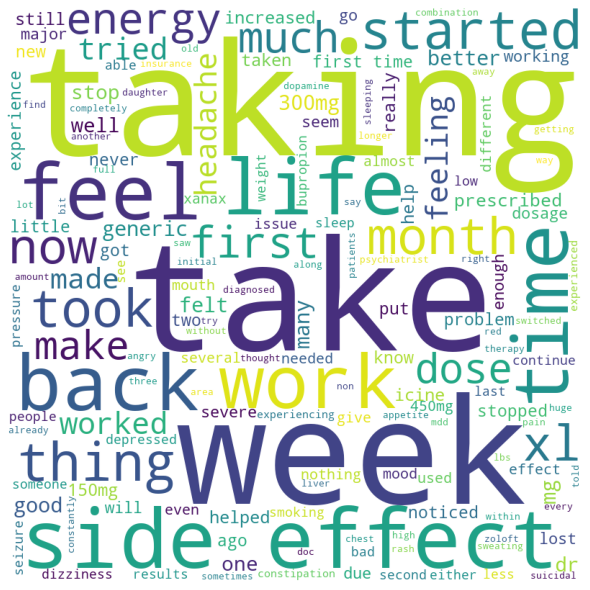

In [ ]:
import pandas as pd 
data=pd.read_csv("Depression.csv")
words=[]
drugs= [i for i in dict(data["Drug"].value_counts())]
for drug in drugs:
  print("--------",drug,"--------")
  print("************Male*************")
  drug_word=(list(make_cloud(drug,data,"Male").items()))
  print("***********Female***********")
  drug_word+=list((make_cloud(drug,data,"Female")).items())
  words.append(drug_word)
  drug_word=[]

In [ ]:
def rf(parameter):
  values=dict(data[parameter].value_counts(normalize=True))
  new_values=[]
  for val,rf in values.items():
    for p in list(data[parameter]):
      if(p==val):
        new_values.append(rf)
  data[parameter]=new_values
rf("Effectiveness")
rf("Satisfaction")
rf("EaseofUse")
data.head()


Unnamed: 0    Age  ... UsefulCount Score
0       28936  25-34  ...           0    19
1       28958  25-34  ...           0     5
2       29010  19-24  ...           0    23
3       29166  35-44  ...           0    11
4       29194  45-54  ...           0    14

[5 rows x 14 columns]

In [ ]:
old_keywords=[]
keywords=[]
for e in words:
  for f in e:
    old_keywords.append(f)
seen=set()
for t in old_keywords:
    if t[0] in seen:
      continue
    else:
      keywords.append(t)
      seen.add(t[0])    
keywords=sorted(keywords,key=lambda x:x[1],reverse=True)
print(keywords)
reviews=list(data["Reviews"])
count=0;
score=[]
for r in reviews:
  for word,value in keywords:
    r_words=set(r.split(" "))
    if word in r_words:
      count+=1
  score.append(count)
  count=0
print(score)
print(len(score))
print(len(reviews))
data["Score"]=score
data.to_csv("Depression_final.csv")

In [ ]:
import pandas as pd   
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

med = pd.read_csv('Depression_final.csv')
def makebox(x_parameter , y_parameter):
  sns.set_style("whitegrid") 
  sns.boxplot(x=x_parameter, y =y_parameter, data = med , showfliers = False) 

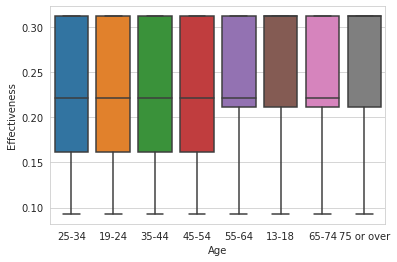

In [ ]:
#how effective anti-depresants are for a given age group
makebox("Age" , "Effectiveness")

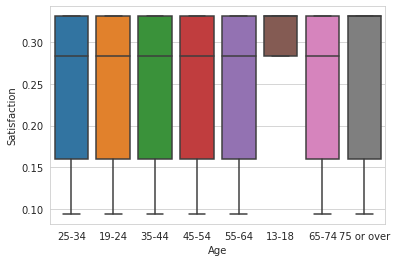

In [ ]:
#Level of satisfaction after usage of anti-depresants for a given age group
makebox("Age" , "Satisfaction")

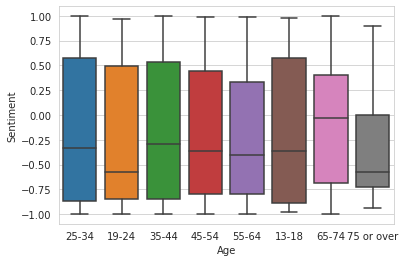

In [ ]:
makebox("Age","Sentiment")

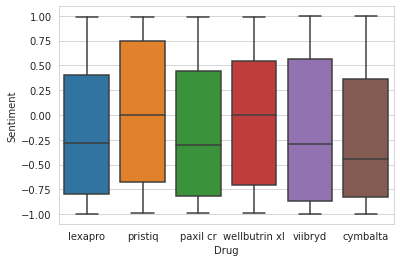

In [ ]:
makebox("Drug","Sentiment")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbae5cb2908>]],
      dtype=object)

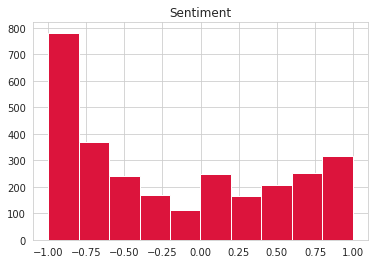

In [ ]:
data.hist("Sentiment",color="crimson")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbae5c3be48>]],
      dtype=object)

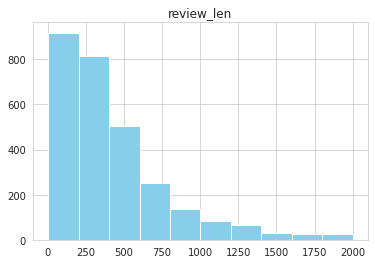

In [ ]:
data['review_len'] = data['Reviews'].astype(str).apply(len)
data.hist("review_len",color="skyblue")

In [ ]:
!pip install chart_studio

     |████████████████████████████████| 71kB 3.2MB/s 


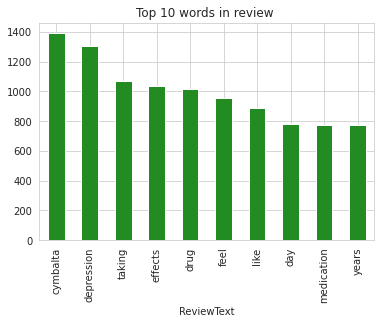

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(data['Reviews'], 10)
df = pd.DataFrame(common_words, columns = ['ReviewText' , 'count'])
df.groupby('ReviewText').sum()['count'].sort_values(ascending=False).plot(
kind='bar', color="forestgreen", title='Top 10 words in review ')

#Normalization

Finding Mean and Variance of numeric columns

In [ ]:
import pandas as pd
df=pd.read_csv("Depression_final.csv")
df2=data.copy(deep=True)

In [ ]:
mean_effectiveness,variance_effectiveness=data["Effectiveness"].mean(),data["Effectiveness"].var()
mean_satisfaction,variance_satisfaction=data["Satisfaction"].mean(),data["Satisfaction"].var()
mean_EaseofUse,variance_EaseofUse=data["EaseofUse"].mean(),data["EaseofUse"].var()
mean_Score,variance_Score=data["Score"].mean(),data["Score"].var()
print("Mean effectiveness",mean_effectiveness)
print("Mean satisfaction",mean_satisfaction)
print("Mean Ease of use",mean_EaseofUse)
print("Mean Review score",mean_Score)
print("Variance of effectiveness",variance_effectiveness)
print("Variance of satisfaction",variance_satisfaction)
print("Variance of Ease of use",variance_EaseofUse)
print("Variance of Score",variance_Score)

Mean effectiveness 0.22610226402855882
Mean satisfaction 0.24143867521437884
Mean Ease of use 0.362002701042518
Mean Review score 14.260930395243092
Variance of effectiveness 0.004675698735582462
Variance of satisfaction 0.00782232789358115
Variance of Ease of use 0.041982180303396045
Variance of Score 135.15232537618854


Performing Normalization

In [ ]:
import math
#df2["Effectiveness"]=(data["Effectiveness"]-round(data["Effectiveness"].mean(),2))/round(data["Effectiveness"].std(),2)
#df2["EaseofUse"]=(data["EaseofUse"]-round(data["EaseofUse"].mean(),2))/round(data["EaseofUse"].std(),2)
#df2["Satisfaction"]=(data["Satisfaction"]-round(data["Satisfaction"].mean(),2))/round(data["Satisfaction"].std(),2)
df2["Score"]=(data["Score"]-round(data["Score"].mean(),2))/round(data["Score"].std(),2)
#print(df2["Effectiveness"].mean())
#print(df2["EaseofUse"].mean())
#print(df2["Satisfaction"].mean())
print(df2["Score"].mean())
#print(df2["Effectiveness"].std())
#print(df2["EaseofUse"].std())
#print(df2["Satisfaction"].std())
print(df2["Score"].std())

-0.055681942449200085
0.010013505212491279
0.015985280159777678
7.999959097916832e-05
0.9768440160801586
1.024477675493672
0.9827102792963149
0.9996133474715806


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbaef808898>]],
      dtype=object)

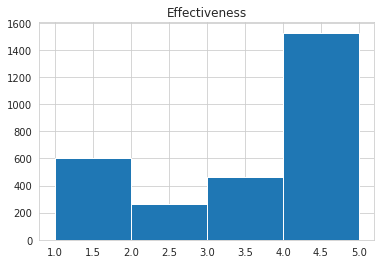

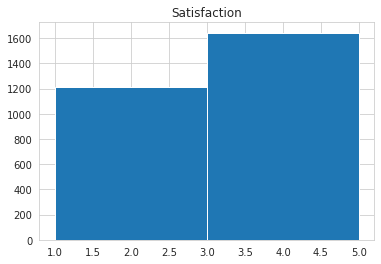

In [ ]:
data.hist("Effectiveness",bins=4)
data.hist("Satisfaction",bins=2)


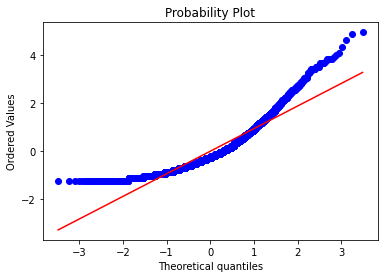

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcb7bd22128>]],
      dtype=object)

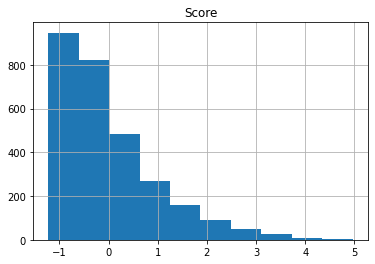

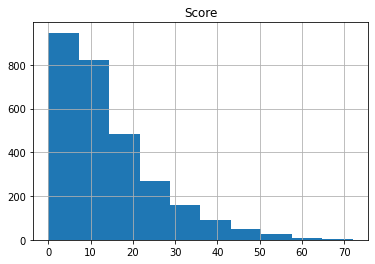

In [ ]:
stats.probplot(norm_score, dist="norm", plot=pylab)
pylab.show()
print()
df2.hist("Score")

#Hypothesis


1. H0 = Mean Effectiveness of Cymbalta for females- Mean Effectiveness of Cymbalta for males<=0.5

  H1 = Mean Effectiveness of Cymbalta for females - Mean Effectiveness of Cymbalta for males>0.5
2. H0 = Mean Effectiveness of viibryd for females - Mean Effectiveness for males<=0.5

  H1 = Mean Effectiveness of viibryd for females - Mean Effectiveness for males>0.5
3. H0 = Mean Effectiveness of Cymbalta for one age group - Mean Effectiveness for another age group<=0.5

  H1 = Mean Effectiveness of Cymbalta for one age group -  Mean Effectiveness for another age group>0.5
4. H0 = Mean Effectiveness of viibryd for one age group - Mean Effectiveness for another age group<=0.5

  H1 = Mean Effectiveness of viibryd for one age group -     Mean Effectiveness for another age group>0.5
5. H0 = Mean effectiveness of Cymbalta >= 0.5<br>
    H1 = Mean effectiveness of Cymbalta < 0.5
6. H0 = Mean score for female <= Mean score for male 

  H1 = Mean score for female > Mean score for male





In [ ]:
def hypothesis_gender(drugs, property_d):
  from scipy import stats
  drugdata = data.loc[data['Drug'] == drugs]
  drugdata=drugdata.loc[drugdata['Age']=='19-24']
  drugdata_f = drugdata.loc[drugdata['Sex'] == 'Female']
  drugdata_m = drugdata.loc[drugdata['Sex'] == 'Male']
  mean_effectiveness_f = drugdata_f[property_d].mean()
  mean_effectiveness_m = drugdata_m[property_d].mean()
  print("Female:",mean_effectiveness_f)
  print("Male:",mean_effectiveness_m)
  a = mean_effectiveness_f - mean_effectiveness_m
  b = (drugdata_f[property_d].std()**2)/len(drugdata_f[property_d]) +(drugdata_m[property_d].std()**2)/len(drugdata_m[property_d])
  z = a-0.5/(b**(1/2))
  p= stats.norm.sf(abs(z))
  alpha=0.10
  print("P-value = ",p)
  if(p>alpha):
    print(" Failed to reject H0.")
  else:
    print("Accept A.H and reject N.H or 'Mean "+property_d+" of "+drugs+" for females is greater than males'")

def hypothesis_age(drugs, property_d):
  from scipy import stats
  drugdata = data.loc[data['Drug'] == drugs]
  drugdata_f = drugdata.loc[drugdata['Age'] == '13-18']
  drugdata_m = drugdata.loc[drugdata['Age'] == '65-74']
  mean_effectiveness_f = drugdata_f[property_d].mean()
  mean_effectiveness_m = drugdata_m[property_d].mean()
  a = mean_effectiveness_f - mean_effectiveness_m
  b = (drugdata_f[property_d].std()**2)/len(drugdata_f[property_d]) +(drugdata_m[property_d].std()**2)/len(drugdata_m[property_d])
  z = a-0.5/(b**(1/2))
  alpha=0.10
  p= stats.norm.sf(abs(z))
  print("P-value = ", p)
  if(p>alpha):
    print("Failed to reject H0")
  else:
     print("Accept A.H and reject N.H or 'Mean "+property_d+" of "+drugs+" for 13-18 yrs is greater than 65-74 yrs'")

def hypothesis_age_gender(drugs):
  from scipy import stats
  from statsmodels.stats import weightstats as stests
  drugdata = data.loc[data['Drug'] == drugs]
  drugdata=drugdata.loc[drugdata["Age"]=="19-24"]
  drugdata_f = drugdata.loc[drugdata['Sex']=="Female"]
  drugdata_m = drugdata.loc[drugdata['Sex']=="Male"]
  mean_effectiveness_f = drugdata_f["Effectiveness"].mean()
  mean_effectiveness_m = drugdata_m["Effectiveness"].mean()
  a = mean_effectiveness_f - mean_effectiveness_m
  b = (drugdata_f["Effectiveness"].std()**2)/len(drugdata_f["Effectiveness"]) +(drugdata_m["Effectiveness"].std()**2)/len(drugdata_m["Effectiveness"])
  z = a/(b**(1/2))
  alpha=0.05
  p= stats.norm.sf(abs(z))
  print("P-value = ", p)
  if(p>alpha):
    print("Failed to reject H0.")
  else:
     print("Accept A.H and reject N.H or 'Mean Effectiveness of "+drugs+" for the age group 19-24 is greater for Females than for males'")

    

def hypothesis_value():
  from scipy import stats
  from statsmodels.stats import weightstats as stests
  
  drugdata = data.loc[data['Drug'] == 'cymbalta']
  mean_effectiveness = drugdata['Effectiveness'].mean()
  z = (mean_effectiveness - 0.3)/(drugdata['Effectiveness'].std())
  alpha=0.05
  p= stats.norm.sf(abs(z))
  print("P-value = ", p)
  if(p>alpha):
    print("Failed to reject H0.")
  else:
     print("Accept A.H and reject N.H")

In [ ]:
def hypothesis_word():
  
  from scipy import stats
  from statsmodels.stats import weightstats as stests
  
  drugdata_f = data.loc[data['Sex'] == 'Female']
  drugdata_m = data.loc[data['Sex'] == 'Male']
  mean_score_f = drugdata_f["Score"].mean()
  mean_score_m = drugdata_m["Score"].mean()

  a = mean_score_m - mean_score_f
  b = (drugdata_f["Score"].std()**2)/len(drugdata_f["Score"]) +(drugdata_m["Score"].std()**2)/len(drugdata_m["Score"])
  z = a/(b**(1/2))
  alpha=0.05
  p= stats.norm.sf(abs(z))
  print("P-value = ", p)
  if(p>alpha):
    print("Failed to reject H0.")
  else:
    print("Accept A.H and reject N.H or 'Mean of score for females is greater than males'")


In [ ]:
hypothesis_gender('cymbalta', 'Effectiveness')

Female: 0.18448527325163158
Male: 0.16886655253032892
P-value =  0.0
Accept A.H and reject N.H or 'Mean Effectiveness of cymbalta for females is greater than males'


In [ ]:
hypothesis_gender('viibryd', 'Effectiveness')

Female: 0.2819167541098285
Male: 0.27590066456803075
P-value =  3.910448457098261e-96
Accept A.H and reject N.H or 'Mean Effectiveness of viibryd for females is greater than males'


In [ ]:
hypothesis_age('cymbalta', 'Effectiveness')

P-value =  0.0
Accept A.H and reject N.H or 'Mean Effectiveness of cymbalta for 13-18 yrs is greater than 65-74 yrs'


In [ ]:
hypothesis_age('viibryd', 'Effectiveness')

P-value =  2.6279794185597736e-164
Accept A.H and reject N.H or 'Mean Effectiveness of viibryd for 13-18 yrs is greater than 65-74 yrs'


In [ ]:
hypothesis_age_gender('cymbalta')

P-value =  0.10752479897359185
Failed to reject H0.


In [ ]:
hypothesis_word()

P-value =  0.3625780340208725
Failed to reject H0.


In [ ]:
hypothesis_value()

P-value =  0.0040511729778761755
Accept A.H and reject N.H


#Correlation


Pearsons correlation: 0.315


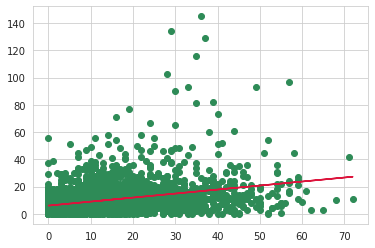

In [ ]:
def calc_pearson(param1,param2):
  import matplotlib.pyplot as plt
  plt.scatter(data[param1], data[param2] ,color="seagreen")
  from scipy.stats import pearsonr 
  corr, _ = pearsonr(data[param1], data[param2]) 
  x_param=data[param1]
  y_param=data[param2]
  m, b = np.polyfit(x_param, y_param, 1)
  plt.plot(x_param, m*x_param + b,color="crimson")
  print('Pearsons correlation: %.3f' % corr) 

calc_pearson("Score","UsefulCount")

Pearsons correlation: 0.889


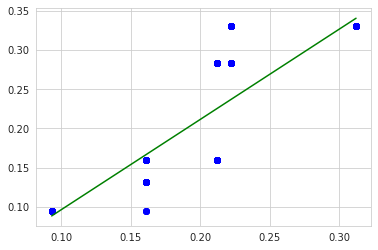

In [ ]:
calc_pearson("Effectiveness","Satisfaction")

Pearsons correlation: 0.918


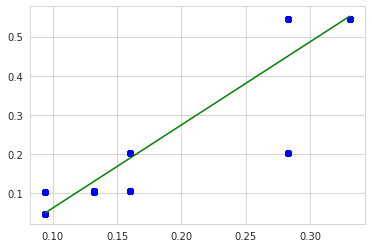

In [ ]:
calc_pearson("Satisfaction","EaseofUse")

Pearsons correlation: 0.815


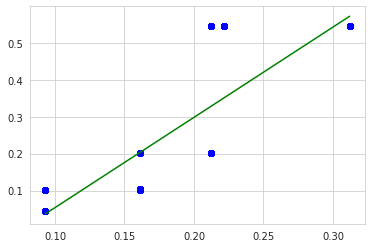

In [ ]:
calc_pearson("Effectiveness","EaseofUse")

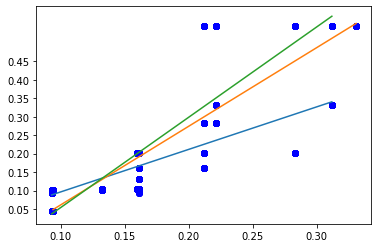

In [ ]:
import matplotlib.pyplot as plt

def make_scatter(x_param , y_param):

  plt.yticks(np.arange(0, 0.5, 0.05))
  plt.xticks(np.arange(0, 1, 0.05))
  plt.scatter(x_param , y_param ,color="b")
  m, b = np.polyfit(x_param, y_param, 1)
  plt.plot(x_param, m*x_param + b)

#Satisfaction vs Ease of use
make_scatter(data["Effectiveness"],data["Satisfaction"])
make_scatter(data["Satisfaction"],data["EaseofUse"])
make_scatter(data["Effectiveness"],data["EaseofUse"])

In [ ]:
def sentiment(sentences):
  values=[]
  sent_obj = SentimentIntensityAnalyzer()
  for sentence in sentences:
    sentiment_dict = sent_obj.polarity_scores(sentence) 
    val=sentiment_dict["compound"]
    values.append(val)
  return values

In [ ]:
def logistic(values,y):
  from sklearn.model_selection import train_test_split
  from sklearn.linear_model import LogisticRegression
  from sklearn.metrics import f1_score
  import numpy as np
  df=pd.read_csv("Depression.csv")
  x=values
  x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.33, random_state=42)
  x_train=np.asarray(x_train).reshape(-1,1)
  x_test=np.asarray(x_test).reshape(-1,1)
  y_train=np.asarray(y_train).reshape(-1,1)
  y_test=np.asarray(y_test).reshape(-1,1)
  from sklearn.model_selection import GridSearchCV
  logreg=LogisticRegression(multi_class="multinomial")
  param_grid = { "C":np.logspace(-3,3,7), "penalty":["l1","l2"]}
  clf = GridSearchCV(logreg,param_grid = param_grid, cv = 10, verbose=True, n_jobs=-1)
  best_clf = clf.fit(x_train, y_train)
  print("tuned hpyerparameters :(best parameters) ",best_clf.best_params_)
  print("accuracy :",best_clf.best_score_)
  y_pred=best_clf.predict(x_test[0:10])
  print("Predicted")
  print(y_pred)
  y_actual=y_train[0:10]
  print(y_actual[:,0])

In [ ]:
from sklearn import preprocessing
df=pd.read_csv("Depression_final.csv")
values=sentiment(df["Reviews"])
values= preprocessing.scale(values)
y=df["EaseofUse"]
logistic(values,y)

Fitting 10 folds for each of 14 candidates, totalling 140 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


tuned hpyerparameters :(best parameters)  {'C': 0.001, 'penalty': 'l2'}
accuracy : 0.5514343368237349
Predicted
[5 5 5 5 5 5 5 5 5 5]
[5 5 1 5 1 5 2 1 4 5]


[Parallel(n_jobs=-1)]: Done 140 out of 140 | elapsed:    1.8s finished


In [ ]:
!pip install -q tensorflow==2.2
!pip install coral-ordinal -q --force-reinstall --no-deps

In [ ]:
from sklearn.model_selection import train_test_split
data["Satisfaction"]=data["Satisfaction"]-1
x_train, x_test, y_train, y_test = train_test_split(data["Reviews"].values, data["Satisfaction"].values, test_size = 0.33, random_state = 1)
num_classes=len(data["Satisfaction"].unique())
print(num_classes)
for i in data["Satisfaction"].values:
   print(i)

In [ ]:
import coral_ordinal as coral
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras.layers import Input,Dense,Dropout
from tensorflow.keras import Model
from tensorflow.keras.optimizers import Adam
input_text = Input(shape = [], dtype = tf.string, name = 'input_text')
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder-large/5")
sent_encoder_model = hub.KerasLayer(embed, input_shape = [],dtype = tf.string,trainable = False)
embedded = sent_encoder_model(input_text)
x = Dense(64, activation = 'relu')(embedded)
x=Dropout(0.4)(x)
output = coral.CoralOrdinal(num_classes)(x) 
model = tf.keras.Model(inputs = input_text, outputs = output)
model.summary()
model.compile(loss = coral.OrdinalCrossEntropy(num_classes), metrics = [coral.MeanAbsoluteErrorLabels],optimizer ="adam")

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_text (InputLayer)      [(None,)]                 0         
_________________________________________________________________
keras_layer_1 (KerasLayer)   (None, 512)               147354880 
_________________________________________________________________
dense_1 (Dense)              (None, 64)                32832     
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
coral_ordinal_1 (CoralOrdina (None, 4)                 68        
Total params: 147,387,780
Trainable params: 32,900
Non-trainable params: 147,354,880
_________________________________________________________________


In [ ]:
history = model.fit(x = x_train, y = y_train,epochs = 5,validation_split = 0.2)
y = model.predict(x_test)
# Convert cumulative logits to probabilities for each class that is  rank or label.
probs = coral.ordinal_softmax(y).numpy()
predicted_rank = probs.argmax(axis = 1)
print(predicted_rank)

Epoch 1/5
48/48 [==============================] - 181s 4s/step - loss: 1.6898 - MeanAbsoluteErrorLabels: 1.8775 - val_loss: 1.9699 - val_MeanAbsoluteErrorLabels: 1.8772
Epoch 2/5
48/48 [==============================] - 184s 4s/step - loss: 1.6435 - MeanAbsoluteErrorLabels: 1.8818 - val_loss: 1.9714 - val_MeanAbsoluteErrorLabels: 1.8793
Epoch 3/5
48/48 [==============================] - 182s 4s/step - loss: 1.6163 - MeanAbsoluteErrorLabels: 1.8774 - val_loss: 1.9509 - val_MeanAbsoluteErrorLabels: 1.8620
Epoch 4/5
48/48 [==============================] - 181s 4s/step - loss: 1.5929 - MeanAbsoluteErrorLabels: 1.8750 - val_loss: 1.9419 - val_MeanAbsoluteErrorLabels: 1.8652
Epoch 5/5
48/48 [==============================] - 185s 4s/step - loss: 1.5679 - MeanAbsoluteErrorLabels: 1.8713 - val_loss: 1.9541 - val_MeanAbsoluteErrorLabels: 1.8544
[4 4 0 4 0 0 4 4 0 0 0 0 4 4 0 0 4 4 0 0 0 0 0 0 4 0 4 0 0 0 4 4 0 0 4 0 4
 4 4 0 4 0 4 4 4 0 4 4 4 0 0 0 4 4 4 4 0 0 0 4 4 4 0 4 0 4 4 4 4 0 4 0 4 0


In [ ]:
y = model.predict(x_test)
# Convert cumulative logits to probabilities for each class that is  rank or label.
probs = coral.ordinal_softmax(y).numpy()
predicted_rank = probs.argmax(axis = 1)
probs = pd.DataFrame(coral.ordinal_softmax(preds).numpy())

print(predicted_rank)

In [ ]:
model.evaluate(x_test,y_test)

30/30 [==============================] - 94s 3s/step - loss: 1.8951 - MeanAbsoluteErrorLabels: 1.8834


[1.895082712173462, 1.8834084272384644]

In [ ]:
model.save("Predictor.hd5")

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Instructions for updating:
If using Keras pass *_constraint arguments to layers.


INFO:tensorflow:Assets written to: Predictor.hd5/assets


INFO:tensorflow:Assets written to: Predictor.hd5/assets


In [ ]:
pd.DataFrame({"true": y_test, "predicted": predicted_rank}).head()

true  predicted
0     4          4
1     4          4
2     2          0
3     4          4
4     1          0